# Лабораторная работа №5. Визуализация данных

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Matplotlib version: 3.9.2


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


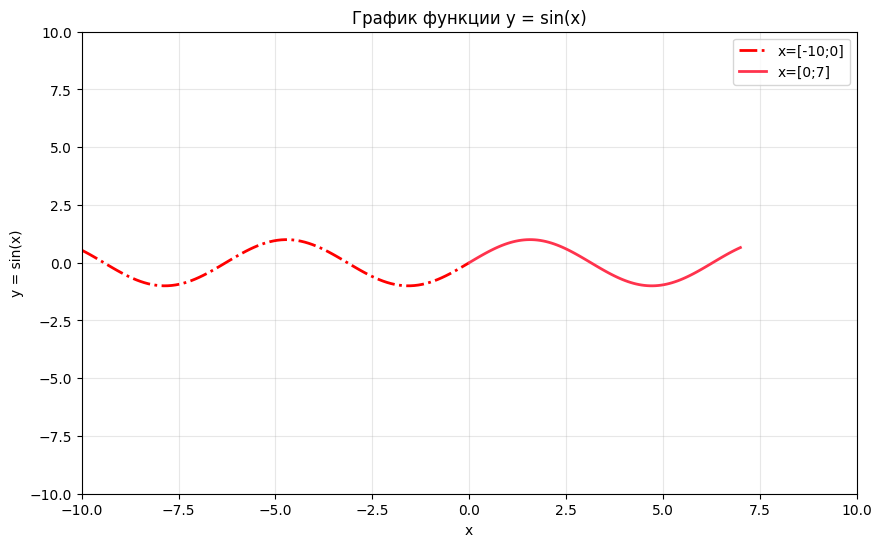

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем данные
x1 = np.linspace(-10, 0, 100)
y1 = np.sin(x1)

x2 = np.linspace(0, 7, 100)
y2 = np.sin(x2)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, 'r-.', label='x=[-10;0]', linewidth=2)
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), label='x=[0;7]', linewidth=2)

# Настраиваем график
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.title('График функции y = sin(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare) 
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

=== ИНФОРМАЦИЯ О ГРАФИКЕ ===
Всего точек на графике: 714
Зеленых кругов (выжившие): 290
Красных крестов (погибшие): 424
Возраст: от 0.4 до 80.0 лет
Стоимость: от $0.0 до $512.3


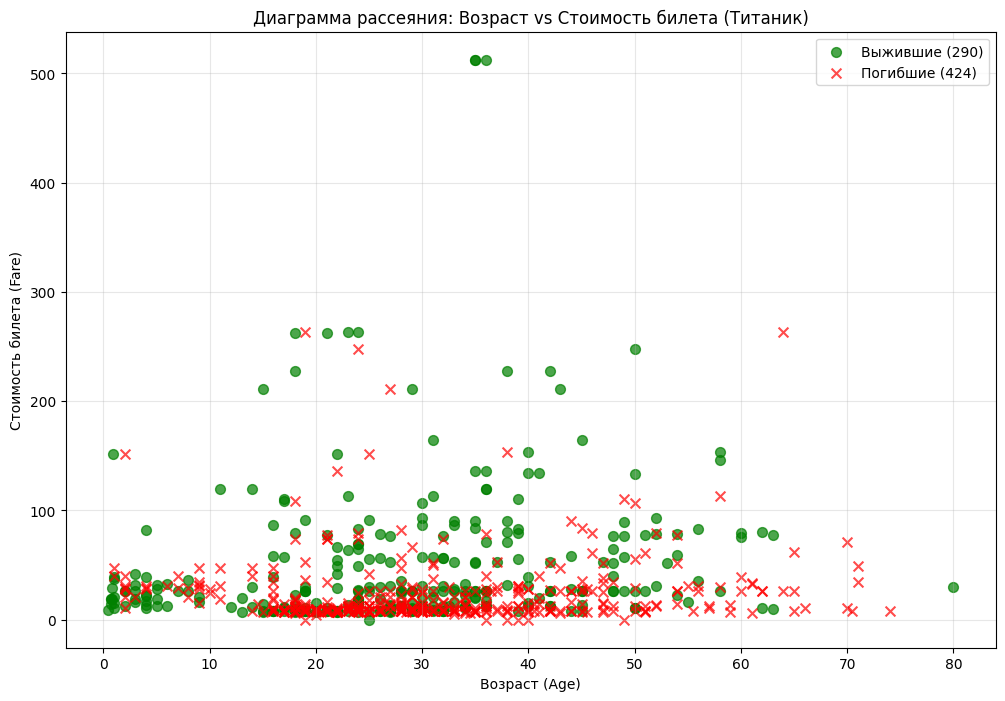

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('C:/python/dap-2024/les05/data/titanic.csv')
titanic_clean = titanic.dropna(subset=['Age', 'Fare'])
survived = titanic_clean[titanic_clean['Survived'] == 1]
not_survived = titanic_clean[titanic_clean['Survived'] == 0]

print("=== ИНФОРМАЦИЯ О ГРАФИКЕ ===")
print(f"Всего точек на графике: {len(titanic_clean)}")
print(f"Зеленых кругов (выжившие): {len(survived)}")
print(f"Красных крестов (погибшие): {len(not_survived)}")
print(f"Возраст: от {titanic_clean['Age'].min():.1f} до {titanic_clean['Age'].max():.1f} лет")
print(f"Стоимость: от ${titanic_clean['Fare'].min():.1f} до ${titanic_clean['Fare'].max():.1f}")

# Строим график
plt.figure(figsize=(12, 8))
plt.scatter(survived['Age'], survived['Fare'], 
           c='green', marker='o', label=f'Выжившие ({len(survived)})', alpha=0.7, s=50)
plt.scatter(not_survived['Age'], not_survived['Fare'], 
           c='red', marker='x', label=f'Погибшие ({len(not_survived)})', alpha=0.7, s=50)

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета (Титаник)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('C:/python/dap-2024/les05/data/titanic_plot_final.png', dpi=300, bbox_inches='tight')
plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

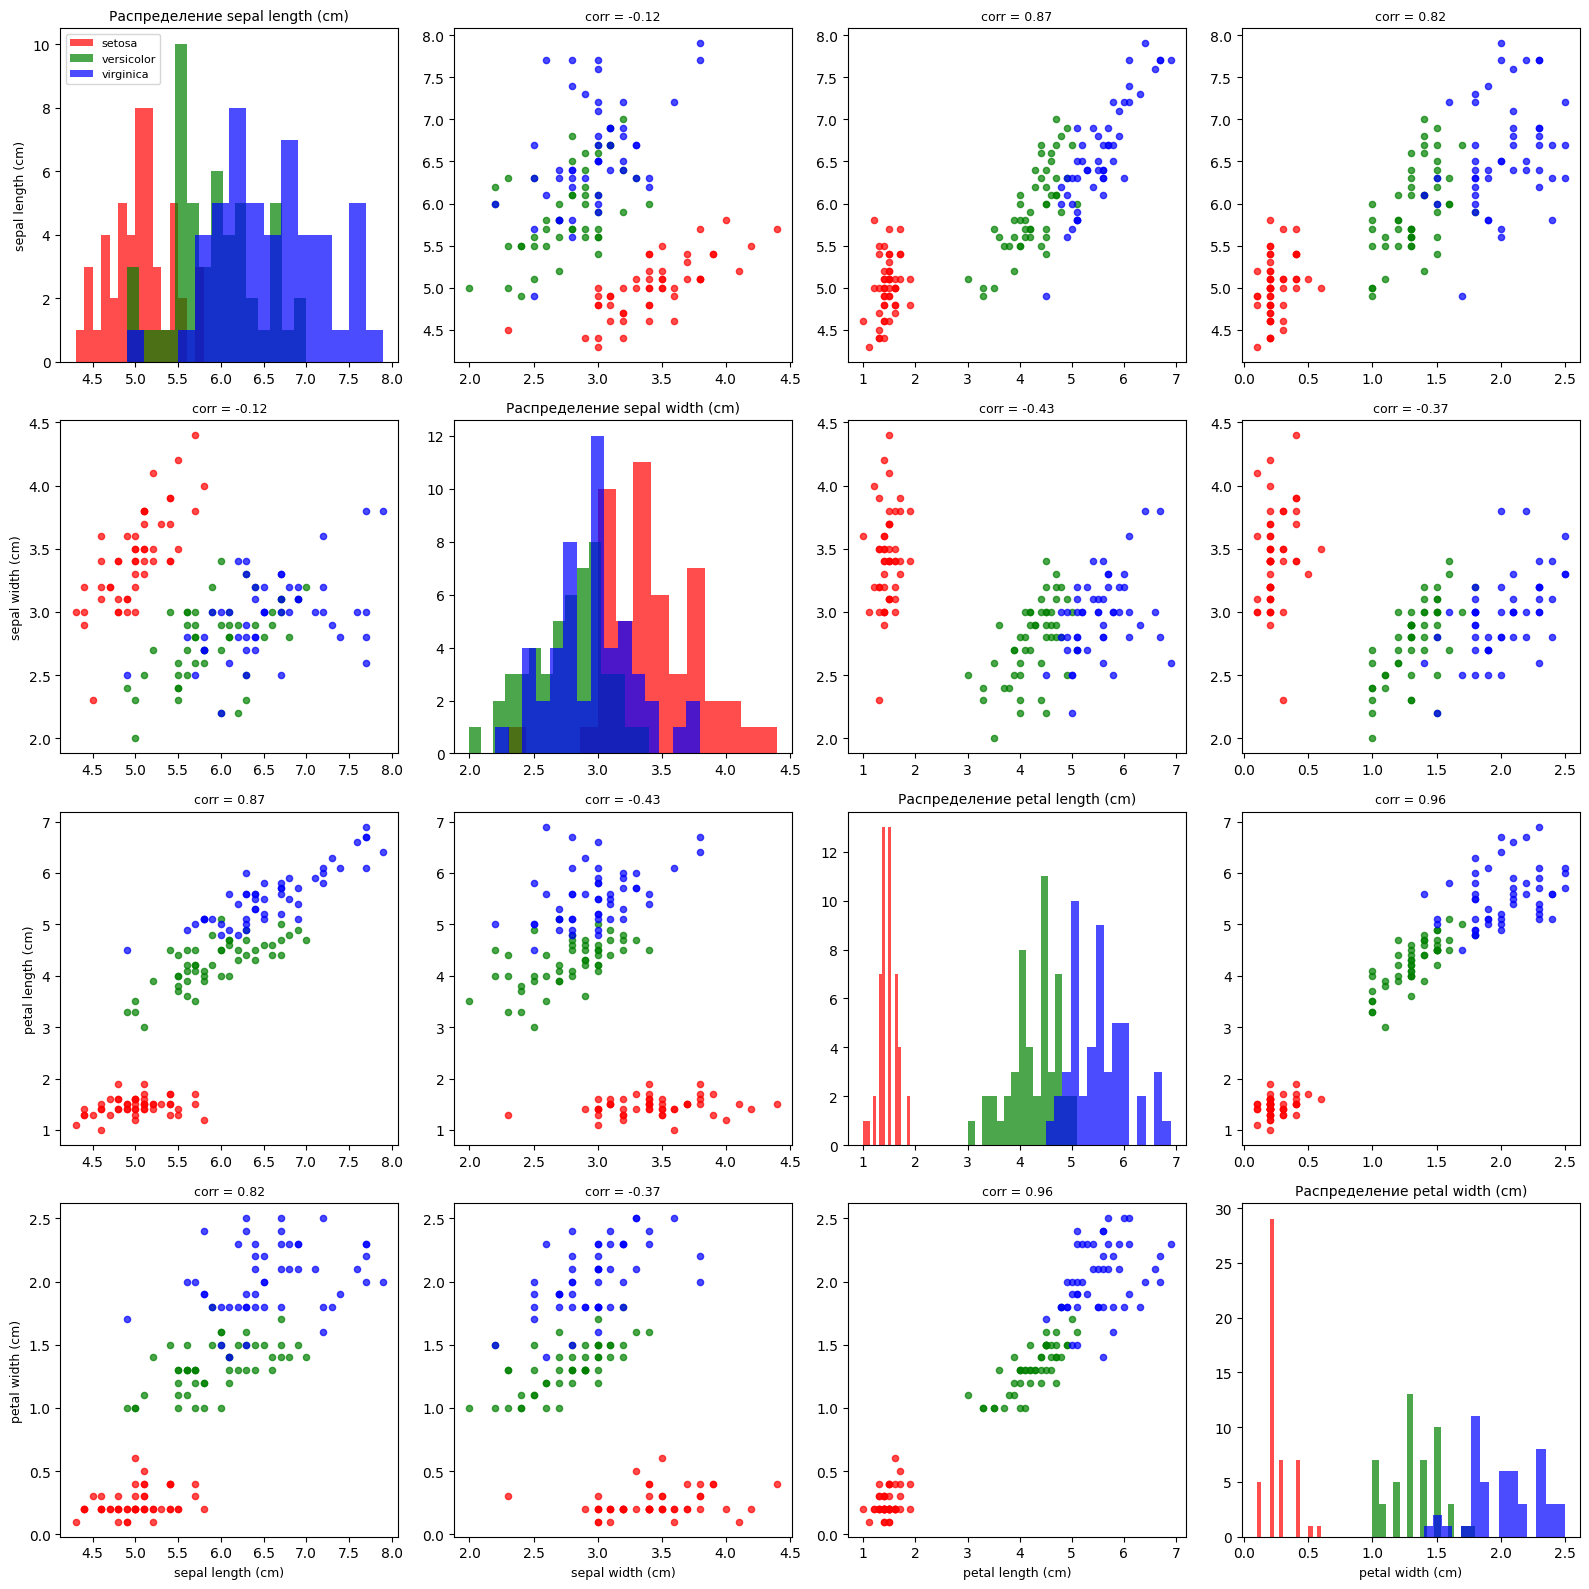

In [ ]:
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
import numpy as np

# Загружаем данные iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Создаем сетку 4x4 графиков
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Цвета для разных видов ирисов
colors = ['red', 'green', 'blue']

# Строим все комбинации графиков
for i in range(4):  # строки
    for j in range(4):  # столбцы
        ax = axes[i, j]
        
        if i == j:
            # Диагональ - гистограммы распределения признаков
            for target in range(3):
                ax.hist(X[y == target, i], bins=15, alpha=0.7, 
                       color=colors[target], label=target_names[target])
            ax.set_title(f'Распределение {feature_names[i]}', fontsize=10)
        else:
            # Диаграммы рассеяния для пар признаков
            for target in range(3):
                ax.scatter(X[y == target, j], X[y == target, i],
                          c=colors[target], label=target_names[target], alpha=0.7, s=20)
            
            # Добавляем корреляцию в заголовок
            correlation = np.corrcoef(X[:, j], X[:, i])[0, 1]
            ax.set_title(f'corr = {correlation:.2f}', fontsize=9)
        
        # Подписи осей
        if i == 3:  # нижний ряд
            ax.set_xlabel(feature_names[j], fontsize=9)
        if j == 0:  # левый столбец
            ax.set_ylabel(feature_names[i], fontsize=9)
        
        # Легенда только на первом графике
        if i == 0 and j == 0:
            ax.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.savefig('C:/python/dap-2024/les05/data/iris_scatter_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

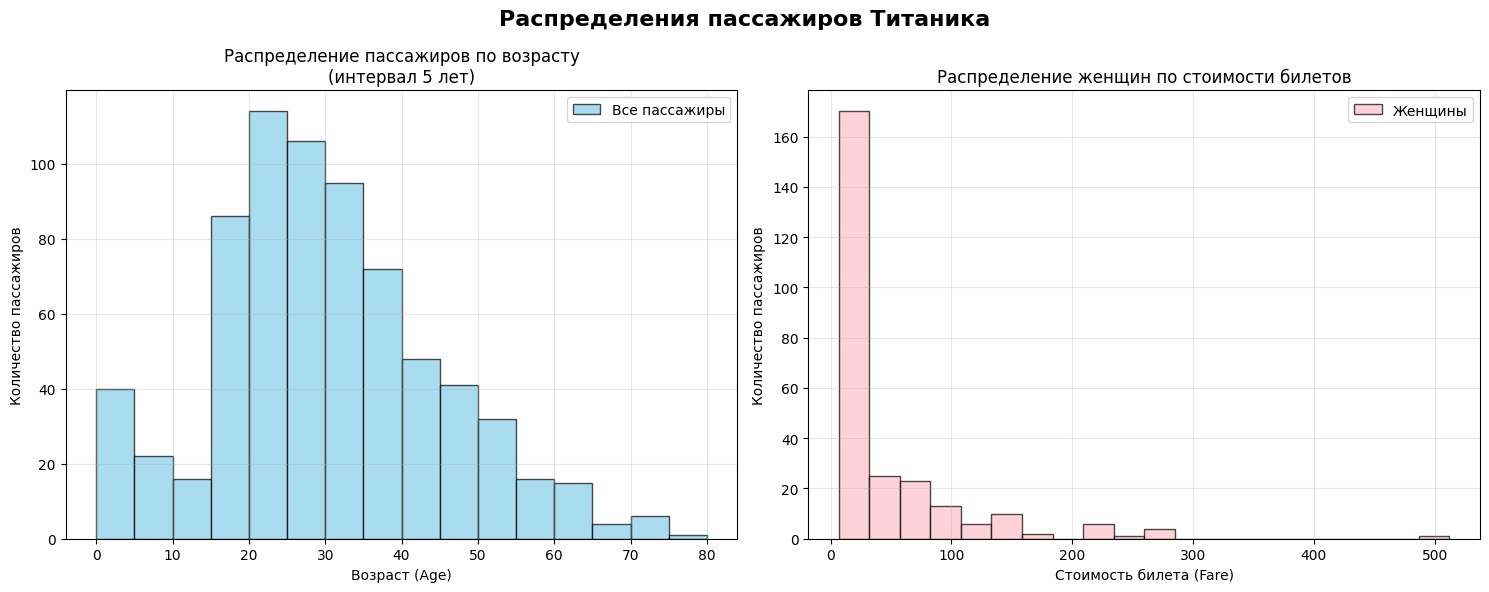

=== СТАТИСТИКА ДЛЯ ГИСТОГРАММ ===
Всего пассажиров с указанным возрастом и стоимостью: 714
Женщин с указанным возрастом и стоимостью: 261
Диапазон возрастов: 0.4 - 80.0 лет
Диапазон стоимости билетов у женщин: $6.8 - $512.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
titanic = pd.read_csv('C:/python/dap-2024/les05/data/titanic.csv')

# Очищаем данные от пропусков в Age и Fare
titanic_clean = titanic.dropna(subset=['Age', 'Fare'])

# Создаем холст с двумя осями
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Первая гистограмма - распределение по возрасту (интервал 5 лет)
ax1.hist(titanic_clean['Age'], bins=range(0, 85, 5), 
         color='skyblue', edgecolor='black', alpha=0.7, label='Все пассажиры')
ax1.set_xlabel('Возраст (Age)')
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Распределение пассажиров по возрасту\n(интервал 5 лет)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Вторая гистограмма - распределение женщин по стоимости билетов
female_data = titanic_clean[titanic_clean['Sex'] == 'female']
ax2.hist(female_data['Fare'], bins=20, 
         color='pink', edgecolor='black', alpha=0.7, label='Женщины')
ax2.set_xlabel('Стоимость билета (Fare)')
ax2.set_ylabel('Количество пассажиров')
ax2.set_title('Распределение женщин по стоимости билетов')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Общий заголовок для всего холста
plt.suptitle('Распределения пассажиров Титаника', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('C:/python/dap-2024/les05/data/titanic_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Выведем статистику
print("=== СТАТИСТИКА ДЛЯ ГИСТОГРАММ ===")
print(f"Всего пассажиров с указанным возрастом и стоимостью: {len(titanic_clean)}")
print(f"Женщин с указанным возрастом и стоимостью: {len(female_data)}")
print(f"Диапазон возрастов: {titanic_clean['Age'].min():.1f} - {titanic_clean['Age'].max():.1f} лет")
print(f"Диапазон стоимости билетов у женщин: ${female_data['Fare'].min():.1f} - ${female_data['Fare'].max():.1f}")

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare) 
* График должен иметь подписи к осям, легенду и заголовок

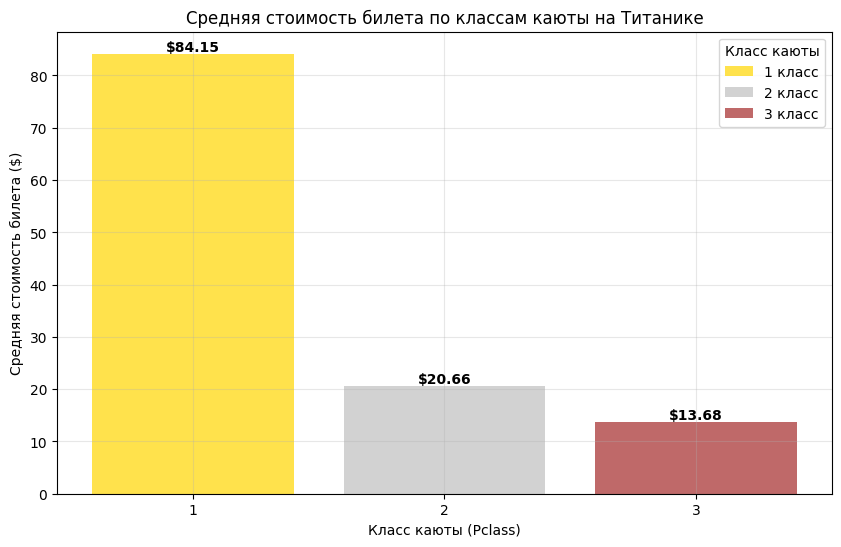

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
titanic = pd.read_csv('C:/python/dap-2024/les05/data/titanic.csv')

# Группируем по классу и вычисляем среднюю стоимость
fare_by_class = titanic.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(fare_by_class.index, fare_by_class.values, 
               color=['gold', 'silver', 'brown'], alpha=0.7,
               label=['1 класс', '2 класс', '3 класс'])  # Добавляем метки сразу

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Средняя стоимость билета ($)')
plt.title('Средняя стоимость билета по классам каюты на Титанике')
plt.xticks([1, 2, 3])

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Красивая легенда в одном месте
plt.legend(title='Класс каюты', loc='upper right')

plt.savefig('C:/python/dap-2024/les05/data/titanic_fare_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

<Figure size 1000x600 with 0 Axes>

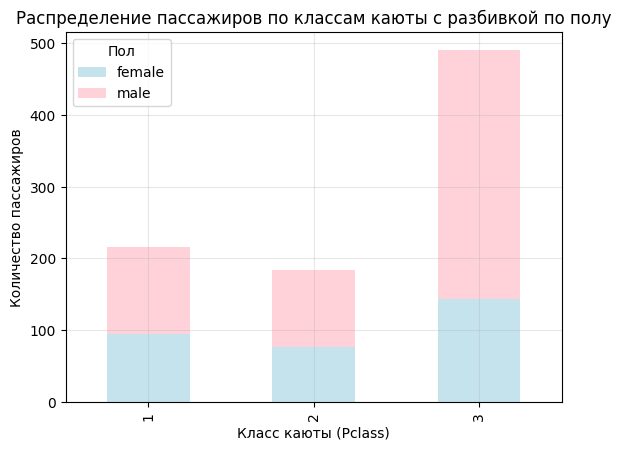

=== РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ И ПОЛУ ===
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347
Всего пассажиров (из данных): 891

Проверка по классам:
Класс 1: 216 пассажиров
Класс 2: 184 пассажиров
Класс 3: 491 пассажиров

Проверка по полу:
Женщин: 314
Мужчин: 577


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
titanic = pd.read_csv('C:/python/dap-2024/les05/data/titanic.csv')

# Группируем данные
class_sex_count = titanic.groupby(['Pclass', 'Sex']).size().unstack()

plt.figure(figsize=(10, 6))
class_sex_count.plot(kind='bar', stacked=True, 
                   color=['lightblue', 'pink'], alpha=0.7)

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение пассажиров по классам каюты с разбивкой по полу')
plt.legend(title='Пол')
plt.grid(True, alpha=0.3)
plt.savefig('C:/python/dap-2024/les05/data/titanic_class_sex.png', dpi=300, bbox_inches='tight')
plt.show()

# ПРАВИЛЬНАЯ статистика
print("=== РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ И ПОЛУ ===")
print(class_sex_count)

# Правильный расчет общего количества
total_calculated = class_sex_count.sum().sum()
print(f"Всего пассажиров (из данных): {len(titanic)}")

# Проверим сумму по классам
print(f"\nПроверка по классам:")
for pclass in [1, 2, 3]:
    class_total = class_sex_count.loc[pclass].sum()
    print(f"Класс {pclass}: {class_total} пассажиров")

# Проверим сумму по полу
print(f"\nПроверка по полу:")
print(f"Женщин: {class_sex_count['female'].sum()}")
print(f"Мужчин: {class_sex_count['male'].sum()}")

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

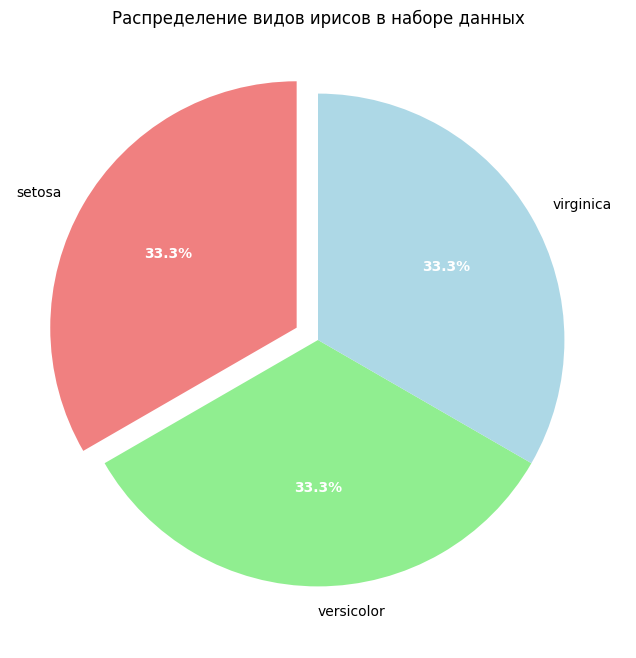

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
target_counts = np.bincount(iris.target)

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(target_counts, 
                                  labels=iris.target_names,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=(0.1, 0, 0),  # Выдвигаем первый сектор
                                  colors=['lightcoral', 'lightgreen', 'lightblue'])

# Улучшаем внешний вид
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Распределение видов ирисов в наборе данных')
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

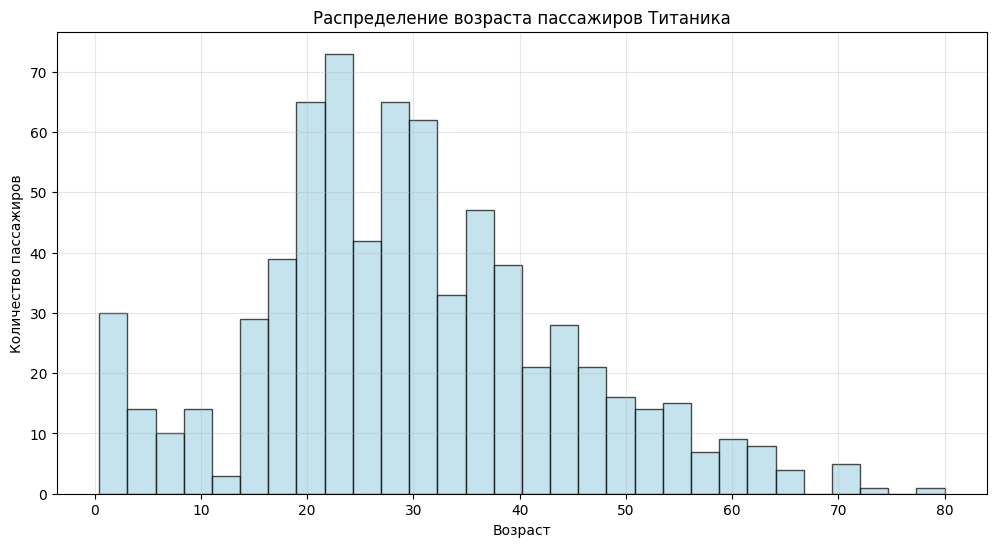

In [ ]:
import seaborn as sns
# Загрузка данных
df = pd.read_csv('sample_data/titanic1.csv')

# Удаляем строки с пропущенными значениями в Age
df_clean = df.dropna(subset=['Age'])

plt.figure(figsize=(12, 6))
# Строим гистограмму с помощью Seaborn
sns.histplot(data=df_clean, x='Age', bins=30, kde=False, color='skyblue')

plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.title('Распределение возраста пассажиров Титаника', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.

## Ответы на вопросы

**1. Для чего используется диаграмма рассеяния?**  

Диаграмма рассеяния используется для визуализации взаимосвязи между двумя непрерывными переменными, выявления корреляций, обнаружения выбросов и анализа распределения данных.


**2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?**  

Гистограмма показывает распределение непрерывной числовой переменной, разбивая данные на интервалы (бины). Отличается от столбчатой диаграммы тем, что гистограмма используется для непрерывных данных (столбцы соприкасаются), а столбчатая - для категориальных данных (столбцы разделены).

**3. Как задать цвет линии в линейном графике Matplotlib?** 

Цвет линии задается через параметр `color`:  
`plt.plot(x, y, color='red')` - название цвета  
`plt.plot(x, y, color='#FF0000')` - HEX код  
`plt.plot(x, y, color=(1.0, 0.0, 0.0))` - RGB кортеж  
`plt.plot(x, y, 'r-')` - сокращенная запись. Для примера ниже код



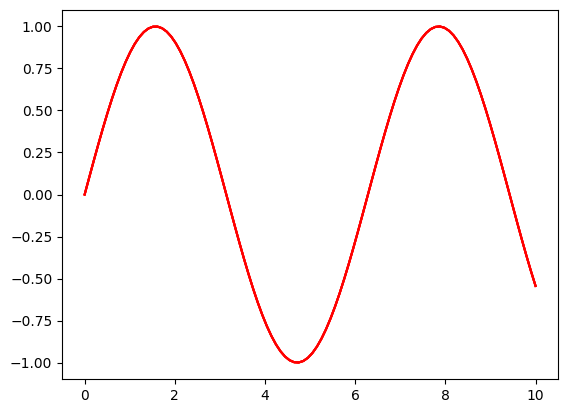

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем данные для графика
x = np.linspace(0, 10, 100)  # 100 точек от 0 до 10
y = np.sin(x)  # значения синуса для каждой точки x

# Теперь можно строить график
plt.plot(x, y, color='red')  # Название цвета
plt.plot(x, y, color='#FF0000')  # HEX код
plt.plot(x, y, color=(1.0, 0.0, 0.0))  # RGB 
plt.plot(x, y, 'r-')  # Сокращенная запись

plt.show()

**4. Чем класс plt.Figure отличается от объекта plt.Axes?**  

`plt.Figure` - это весь холст (окно), содержащий один или несколько графиков.  
`plt.Axes` - это конкретная система координат (график) на холсте Figure.  
Один Figure может содержать несколько Axes (подграфиков).

**5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?**  

Matplotlib позволяет управлять типом маркера через параметр `marker`:

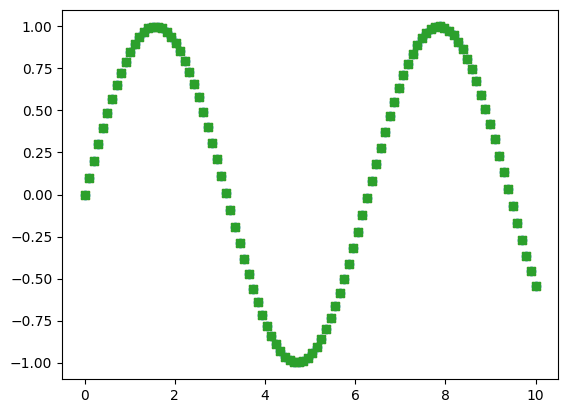

In [ ]:
plt.scatter(x, y, marker='o')  # круг
plt.scatter(x, y, marker='x')  # крест
plt.scatter(x, y, marker='s')  # квадрат

**6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?**  

Нет. Существуют и другие библиотеки: Seaborn, Plotly, Bokeh, Altair, ggplot и другие.

**7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?** 
 
Нет. Matplotlib позволяет сохранять графики в различные форматы через `plt.savefig()`:  
`plt.savefig('graph.png', dpi=300)`  
`plt.savefig('graph.pdf')`  
`plt.savefig('graph.jpg')`

**8. В наборе данных iris представлены 4 вида ирисов. Да или нет?**  

Нет. В наборе данных iris представлены 3 вида ирисов: setosa, versicolor и virginica.

**9. Для всех пассажиров "Титаника" указан возраст. Да или нет?**  

Нет. В данных Titanic есть пропущенные значения в столбце Age. Из 891 пассажира возраст указан только у 714.

**10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.**  

Нет. На одном холсте можно располагать больше 16 диаграмм. Размеры графиков можно регулировать параметром `figsize`, настройкой расположения subplots и использованием `plt.tight_layout()`.